Nama   : Intan Nur'aulia

NPM    : 23083010087

Matkul : Analisis Data Eksploratif (A)

# Memeriksa Data apakah ada Missing Value

In [23]:
# mengimport library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                            AdaBoostClassifier, GradientBoostingClassifier

plt.rcParams['figure.figsize'] = (10, 7)

In [24]:
df = pd.read_csv('C:\\Users\\hp\\Documents\\rekap.csv', delimiter=';')
df

,id_universitas,universitas,jenis_universitas,wilayah,provinsi,kode_prodi,nama_prodi,jenjang,daya_tampung_2024,peminat,portofolio
0,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111001,PENDIDIKAN DOKTER HEWAN,Sarjana,84,548.0,Tidak Ada
1,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111002,TEKNIK SIPIL,Sarjana,98,587.0,Tidak Ada
2,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111003,TEKNIK MESIN,Sarjana,42,231.0,Tidak Ada
3,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111004,TEKNIK KIMIA,Sarjana,56,155.0,Tidak Ada
4,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111005,ARSITEKTUR,Sarjana,56,296.0,Tidak Ada
...,...,...,...,...,...,...,...,...,...,...,...
4778,713,UNIVERSITAS ISLAM NEGERI ALAUDDIN,PT KEAGAMAAN ISLAM NEGERI,SULAWESI,SULSEL,713047,HUBUNGAN INTERNASIONAL,Sarjana,48,109.0,Tidak Ada
4779,713,UNIVERSITAS ISLAM NEGERI ALAUDDIN,PT KEAGAMAAN ISLAM NEGERI,SULAWESI,SULSEL,713048,KESEJAHTERAAN SOSIAL,Sarjana,48,44.0,Tidak Ada
4780,732,UNIVERSITAS ISLAM NEGERI DATOKARAMA PALU,PT KEAGAMAAN ISLAM NEGERI,SULAWESI,SULTENG,732001,INFORMATIKA,Sarjana,45,31.0,Tidak Ada
4781,732,UNIVERSITAS ISLAM NEGERI DATOKARAMA PALU,PT KEAGAMAAN ISLAM NEGERI,SULAWESI,SULTENG,732002,ARSITEKTUR,Sarjana,18,5.0,Tidak Ada


Membuat df.info() untuk memudahkan membaca datanya

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4783 entries, 0 to 4782
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_universitas     4783 non-null   int64  
 1   universitas        4783 non-null   object 
 2   jenis_universitas  4783 non-null   object 
 3   wilayah            4783 non-null   object 
 4   provinsi           4783 non-null   object 
 5   kode_prodi         4783 non-null   int64  
 6   nama_prodi         4783 non-null   object 
 7   jenjang            4783 non-null   object 
 8   daya_tampung_2024  4783 non-null   int64  
 9   peminat            4555 non-null   float64
 10  portofolio         4783 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 411.2+ KB


df.isnull() digunakan untuk mengecek apakah data memiliki nilai kosong, jika "False" berarti data tersebut memiliki nilai valid, jika "True" berarti data tersebut memiliki nilai null

In [26]:
df.isnull()

,id_universitas,universitas,jenis_universitas,wilayah,provinsi,kode_prodi,nama_prodi,jenjang,daya_tampung_2024,peminat,portofolio
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4778,False,False,False,False,False,False,False,False,False,False,False
4779,False,False,False,False,False,False,False,False,False,False,False
4780,False,False,False,False,False,False,False,False,False,False,False
4781,False,False,False,False,False,False,False,False,False,False,False


In [27]:
# untuk mengetahui jumlah missing value
np.sum(df.isnull())

id_universitas         0
universitas            0
jenis_universitas      0
wilayah                0
provinsi               0
kode_prodi             0
nama_prodi             0
jenjang                0
daya_tampung_2024      0
peminat              228
portofolio             0
dtype: int64

Ditemukan Misising Value pada Data

Karena ditemukan missing value, maka selanjutnya mengatasi missing value tersebut dengan menghapus baris yang memiliki missing value

In [29]:
df = df.dropna(thresh=len(df) * 0.7)

In [30]:
np.sum(df.isnull()) 

id_universitas       0.0
universitas          0.0
jenis_universitas    0.0
wilayah              0.0
provinsi             0.0
kode_prodi           0.0
nama_prodi           0.0
jenjang              0.0
daya_tampung_2024    0.0
peminat              0.0
portofolio           0.0
dtype: float64

# Memeriksa Data Outlier

In [43]:
import pandas as pd
data = pd.read_csv('C:\\Users\\hp\\Documents\\rekap.csv',  sep = ";", on_bad_lines='skip')
df.head()

,id_universitas,universitas,jenis_universitas,wilayah,provinsi,kode_prodi,nama_prodi,jenjang,daya_tampung_2024,peminat,portofolio
0,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111001,PENDIDIKAN DOKTER HEWAN,Sarjana,84,548.0,Tidak Ada
1,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111002,TEKNIK SIPIL,Sarjana,98,587.0,Tidak Ada
2,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111003,TEKNIK MESIN,Sarjana,42,231.0,Tidak Ada
3,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111004,TEKNIK KIMIA,Sarjana,56,155.0,Tidak Ada
4,111,UNIVERSITAS SYIAH KUALA,PTN AKADEMIK,SUMATERA,ACEH,111005,ARSITEKTUR,Sarjana,56,296.0,Tidak Ada


In [44]:
# Kolom yang akan dicek untuk outliers dan dibuatkan boxplot
numerical_columns = ['daya_tampung_2024', 'peminat']

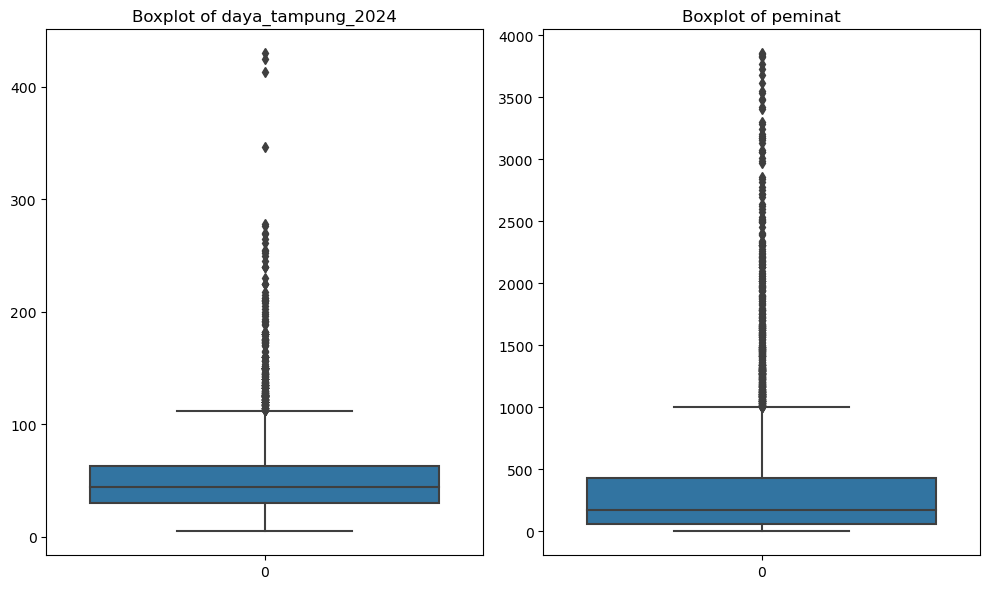

In [45]:
# 1. Membuat Boxplot untuk kolom numerik
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Ditemukan data outlier pada kolom 'daya_tampung_2024' dan 'peminat'

# Mengatasi Outlier pada kolom Age

Mengatasi Outlier dengan metode IQR

In [49]:
#Mengganti Outlier
Q1 = data['daya_tampung_2024'].quantile(0.25)
Q3 = data['daya_tampung_2024'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['daya_tampung_2024'] = data['daya_tampung_2024'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

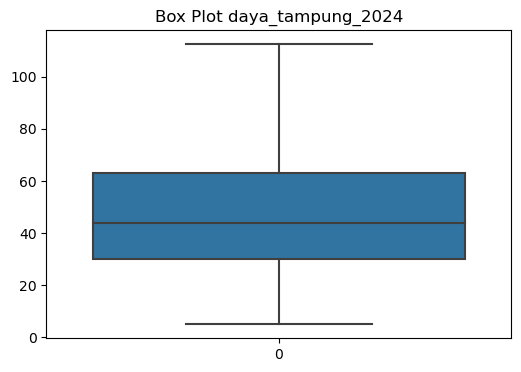

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

columns=['daya_tampung_2024'] 

for col in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data[col])
    plt.title(f'Box Plot {col}')
    plt.show()

In [51]:
#Mengganti Outlier
Q1 = data['peminat'].quantile(0.25)
Q3 = data['peminat'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['peminat'] = data['peminat'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

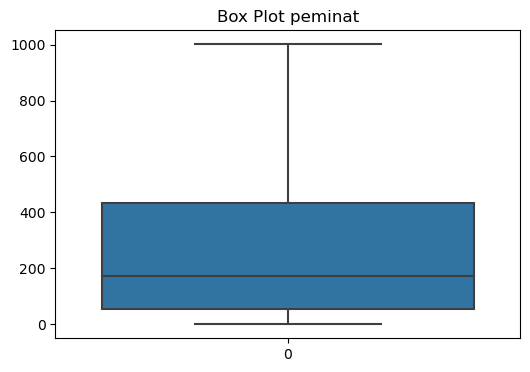

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

columns=['peminat'] 

for col in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data[col])
    plt.title(f'Box Plot {col}')
    plt.show()

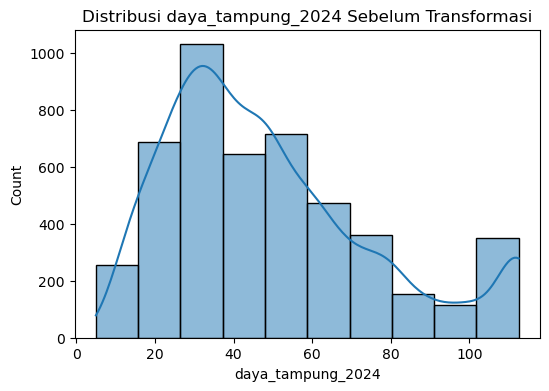

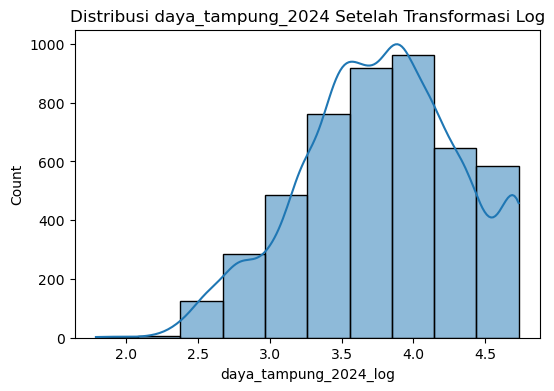

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi Sebelum Transformasi
plt.figure(figsize=(6,4))
sns.histplot(data['daya_tampung_2024'], bins=10, kde=True)
plt.title('Distribusi daya_tampung_2024 Sebelum Transformasi')
plt.show()

# Log Transformation
# Tambahkan 1 ke daya_tampung_2024 agar tidak ada nilai 0 (karena log(0) tidak terdefinisi)
data['daya_tampung_2024_log'] = np.log(data['daya_tampung_2024'] + 1)

# Visualisasi Setelah Transformasi
plt.figure(figsize=(6,4))
sns.histplot(data['daya_tampung_2024_log'], bins=10, kde=True)
plt.title('Distribusi daya_tampung_2024 Setelah Transformasi Log')
plt.show()

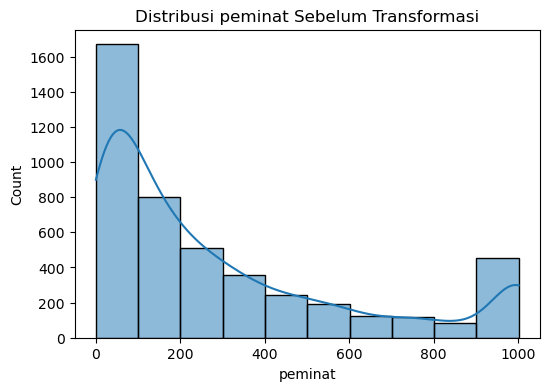

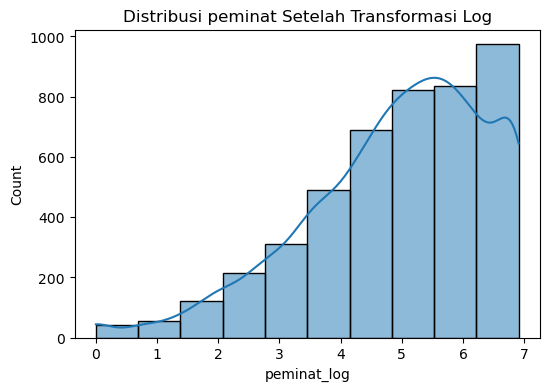

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi Sebelum Transformasi
plt.figure(figsize=(6,4))
sns.histplot(data['peminat'], bins=10, kde=True)
plt.title('Distribusi peminat Sebelum Transformasi')
plt.show()

# Log Transformation
# Tambahkan 1 ke daya_tampung_2024 agar tidak ada nilai 0 (karena log(0) tidak terdefinisi)
data['peminat_log'] = np.log(data['peminat'] + 1)

# Visualisasi Setelah Transformasi
plt.figure(figsize=(6,4))
sns.histplot(data['peminat_log'], bins=10, kde=True)
plt.title('Distribusi peminat Setelah Transformasi Log')
plt.show()

Visualisasi Sebelum Transformasi: Menggunakan histogram dan KDE (Kernel Density Estimation) untuk melihat distribusi data sebelum transformasi.

Visualisasi Setelah Transformasi: Setelah data di-transform, histogram baru ditampilkan untuk melihat bagaimana distribusi data berubah.